Contenido bajo licencia Creative Commons BY 4.0 y código bajo licencia MIT. © Juan Gómez y Nicolas Guarín-Zapata 2019. Este material es parte del curso Modelación Computacional en el programa de Ingeniería Civil de la Universidad EAFIT.

# Respuesta de una presa trapezoidal de concreto.
(Modelación computacional)

Considere la presa de concreto de forma trapezoidal mostrada en la figura:


<center>
    <img src="img/presa.svg"
         alt="Diagrama de la presa."
         style="width:400px">
</center>



y definida por los siguientes paramétros:

* $H_p $ : altura de la presa .

* $A_p$ : ancho de la pata.

* $A_c$ : ancho de la cresta.

Para efectos del modelo de análisis los paramétros para el rectangulo que representa el suelo se definen como:

* $H_s$ : profundidad del deposito de suelo.

* $D_l$ : distancia de la frontera izquierda medida desde la pata de la presa.

* $D_r$ : distancia de la fronetra derecha medida desde la pata de la presa.

<center>
    <img src="img/presa_dim.svg"
         alt="Diagrama de la presa."
         style="width:400px">
</center>


El material base para el concreto de la presa tiene las siguientes propiedades:

* Módulo de elasticidad: 50 GPa.

* Relación de Poisson: 0.20.

* Resistencia a la compresión: 60 MPa.

* Resistencia a la tensión: 10 MPa.

* Resistencia al corte : 15 MPa.

La presa se construirá sobre un basamento rocoso (basalto asumido elástico ) con las siguientes propiedades:

* Módulo de elasticidad: 60 GPa.

* Relación de Poisson: 0.20.

Se asume además que:

* La presa estará sometida a la acción de la presión hidrostática impartida por un fluido de peso especifico $\gamma = 9.8 \text{ kN/m}^3$ y dada por:

$$p = \gamma z$$

donde  $z$ es la distancia desde la superficie libre del fluido asumida en la misma cota de la cresta de la presa.

## Actividades.

Usando los paramétros geometricos y propiedades de los materiales dadas al inicio del NB indique si la presa falla o no falla. En caso de que esta falle indique la localización de los puntos de falla y los respectivos modos de falla. En caso de que esta no presente falla indique el factor de seguridad en cada caso.

<div class="alert alert-warning">
    
**Herramienta de análisis**

Para realizar el análisis será necesario:

* Crear el modelo por elementos finitos usando gmsh.

* Crear el script de meshio para leer el modelo de gmsh y escribir los archivos de entrada a SolidsPy.

* Crear las rutinas que sean necesarias para la aplicación de las cargas nodales en la superficie vertical de la presa.

* Crear las rutinas que sean necesarias para visualizar resultados adicionales y requeridos para identificar los estados de falla.

</div>

## Análisis

In [10]:
%matplotlib notebook
import numpy as np
import matplotlib.pyplot as plt
import meshio
import solidspy.preprocesor as msh
import solidspy.assemutil as ass
import solidspy.postprocesor as pos
import solidspy.solutil as sol
import aux_functions as aux

In [11]:
# %load files/snippet1.py
mesh = meshio.read("files/dam_param.msh")
points = mesh.points
cells  = mesh.cells
cell_data  = mesh.cell_data
aux.script_mesh(mesh)

H_p   = 100.0
A_c   = 30.0
gamma = 9.8e3
cargas = aux.dam_loading(cells, cell_data, 3000, points, 0.0, gamma, H_p)
#cargas = aux.uniform_loading(cells, cell_data, 3000, points, gamma, H_p)
np.savetxt("files/Dloads.txt", cargas, fmt=("%d", "%.3g", "%.3g"))

In [12]:
# %load files/snippet2.py
nodes, mats, elements, loads = aux.readin()
DME, IBC, neq = ass.DME(nodes, elements)
mat_rigidez = ass.assembler(elements, mats, nodes, neq, DME)

In [14]:
# %load files/snippet3.py
body = False
if body== True:
    force_vec = ass.loadasem(loads, IBC, neq) + aux.body_forces(elements, nodes, neq, DME , force_y=aux.force_y  )   
else:
    force_vec = ass.loadasem(loads, IBC, neq) + aux.body_forces(elements, nodes, neq, DME )

UG = sol.static_sol(mat_rigidez, force_vec)
UC = pos.complete_disp(IBC, nodes, UG)
    

## Postprocesado

<IPython.core.display.Javascript object>


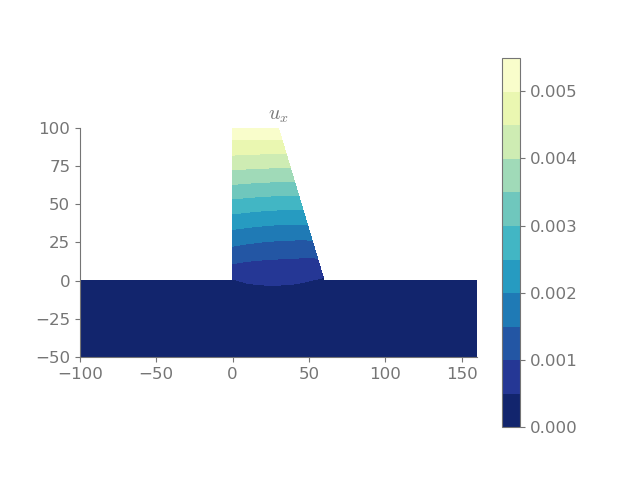

/anaconda3/lib/python3.7/site-packages/matplotlib/contour.py:1000: UserWarning: The following kwargs were not used by contour: 'shading'
  s)


<IPython.core.display.Javascript object>


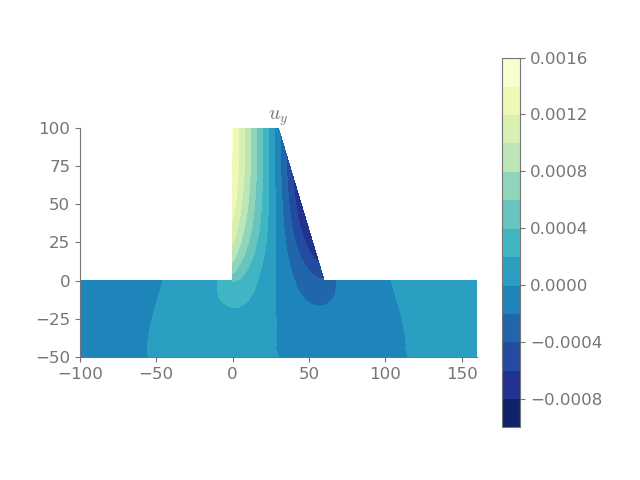

<IPython.core.display.Javascript object>


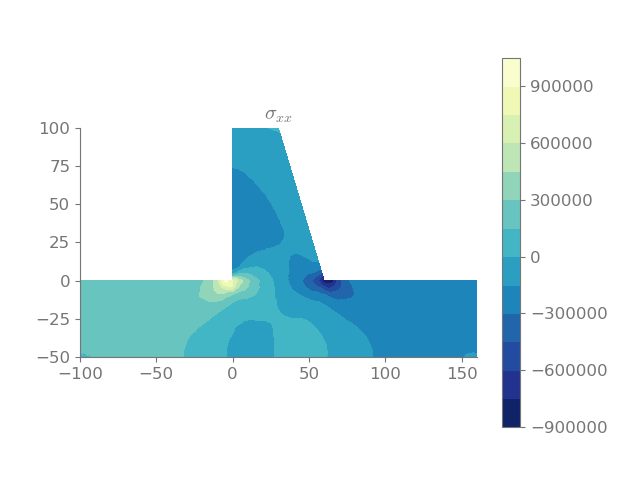

<IPython.core.display.Javascript object>


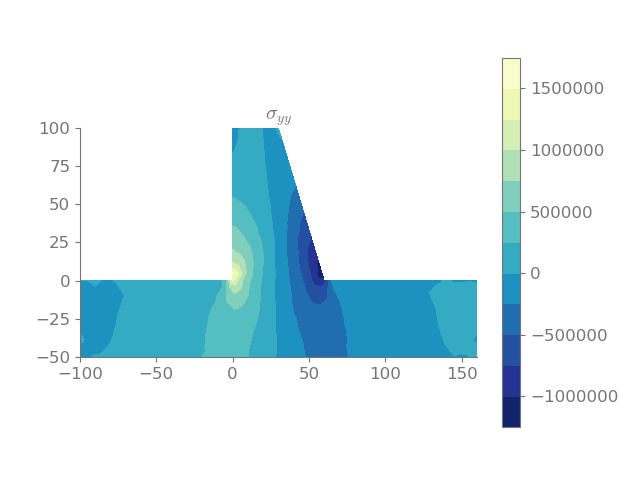

<IPython.core.display.Javascript object>


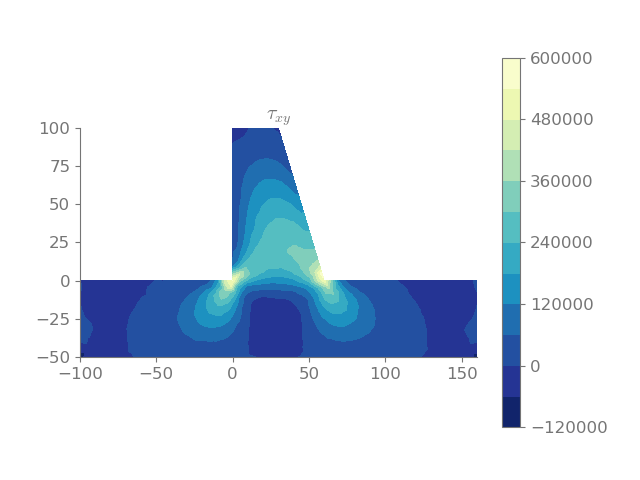

In [15]:
# Post-procese los resultados para análizar el modelo.
E_nodes, S_nodes = pos.strain_nodes(nodes, elements, mats, UC)
pos.fields_plot(elements, nodes, UC, S_nodes=S_nodes)

### Referencias

* Juan Gómez, Nicolás Guarín-Zapata (2018). SolidsPy: 2D-Finite Element Analysis with Python, <https://github.com/AppliedMechanics-EAFIT/SolidsPy>.

In [16]:
from IPython.core.display import HTML
def css_styling():
    styles = open('./nb_style.css', 'r').read()
    return HTML(styles)
css_styling()